In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
#List of possible encodings to try
encodings=['utf-8','latin1','ISO-8859-1','cp1252']
file_path='spam.csv' #change file path
for encoding in encodings:
    try:
        df=pd.read_csv(file_path,encoding=encoding)
        print(f"file successfully read with encoding: (encoding)")
        break
    except UnicodeDecodeError:
        print(f"failed to read with encoding: (encoding)")
        continue
if 'df' in locals():
    print("csv file has been loaded")
else:
    print("unable to read the csv file")

failed to read with encoding: (encoding)
file successfully read with encoding: (encoding)
csv file has been loaded


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5323,ham,Aah bless! How's your arm?,NaN,NaN,NaN
590,spam,For ur chance to win a å£250 wkly shopping spr...,NaN,NaN,NaN
3341,ham,You will go to walmart. I.ll stay.,NaN,NaN,NaN
5550,ham,"Cool, what time you think you can get here?",NaN,NaN,NaN
170,ham,"Sir, I need AXIS BANK account no and bank addr...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## 1.Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
3269,ham,K actually can you guys meet me at the sunoco ...
1658,spam,RGENT! This is the 2nd attempt to contact U!U ...
4901,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4078,ham,O i played smash bros &lt;#&gt; religiously.
4821,spam,u r a winner U ave been specially selected 2 r...


In [8]:
#remaining the cols
df.rename(columns={'v1':'label','v2':'text'},inplace=True)

In [9]:
df.sample(5)

,label,text
3571,ham,"Yup, leaving right now, be back soon"
176,ham,U still going to the mall?
4066,spam,You are being contacted by our Dating Service ...
4737,ham,I bought the test yesterday. Its something tha...
4084,spam,Orange brings you ringtones from all time Char...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['label']=encoder.fit_transform(df['label'])

In [12]:
df.sample()

,label,text
4176,0,Ok lor then we go tog lor...


In [13]:
df.sample(5)

,label,text
2199,0,Not sure I have the stomach for it ...
1875,1,HMV BONUS SPECIAL 500 pounds of genuine HMV vo...
1707,0,Was doing my test earlier. I appreciate you. W...
5125,0,After my work ah... Den 6 plus lor... U workin...
4822,0,:-) :-)


In [14]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#missing values
df.isnull().sum()

label    0
text     0
dtype: int64

In [16]:
#duplicate values
df.duplicated().sum()

403

In [17]:
df=df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

## 2.EDA

In [20]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

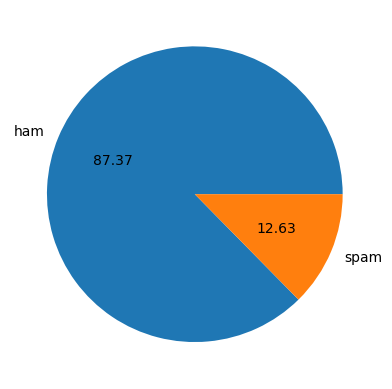

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [23]:
#Imbalanced data

In [24]:
import nltk

In [25]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [26]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [27]:
#no of character
df['num_characters']=df['text'].apply(len)

In [28]:
df.head()

,label,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
#word count
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
df.head()

,label,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
#sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,label,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
df[df['label']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
df[df['label']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

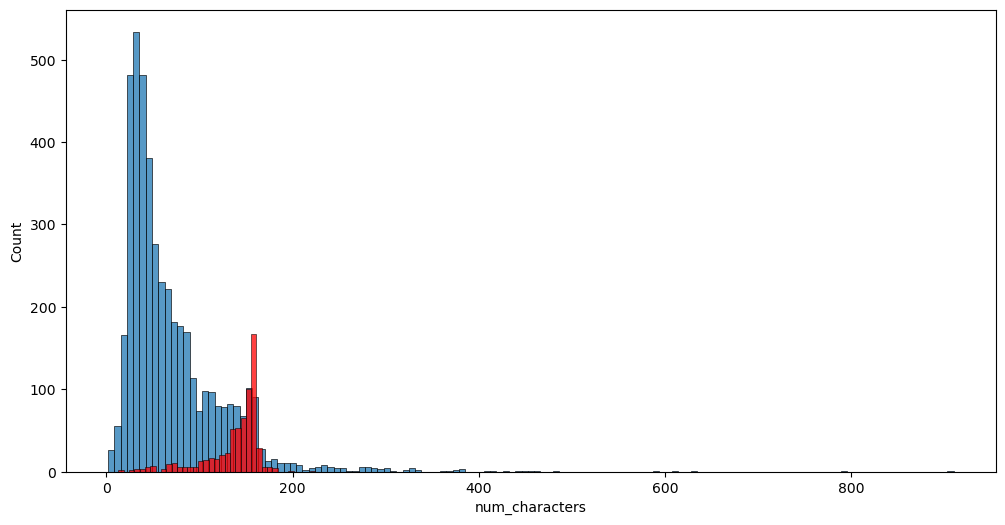

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']==0]['num_characters'])
sns.histplot(df[df['label']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

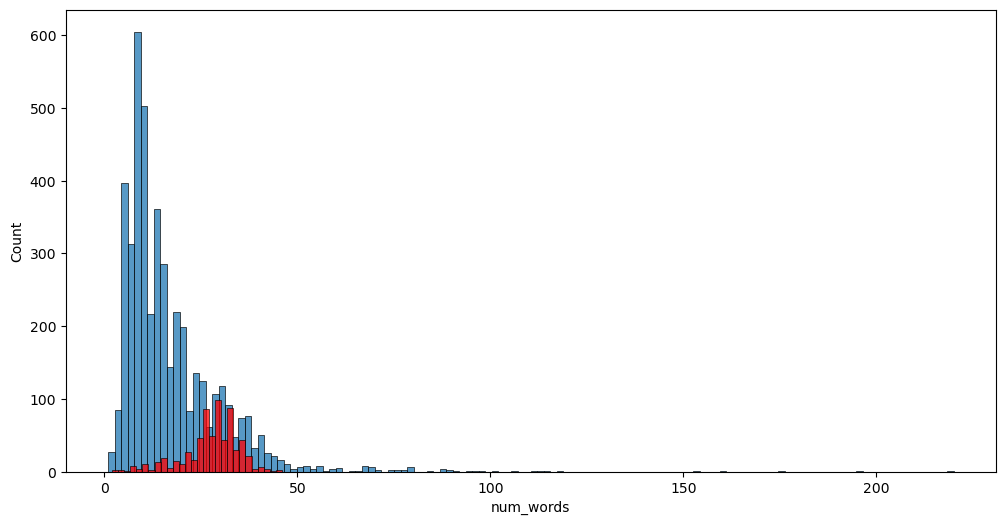

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']==0]['num_words'])
sns.histplot(df[df['label']==1]['num_words'],color='red')

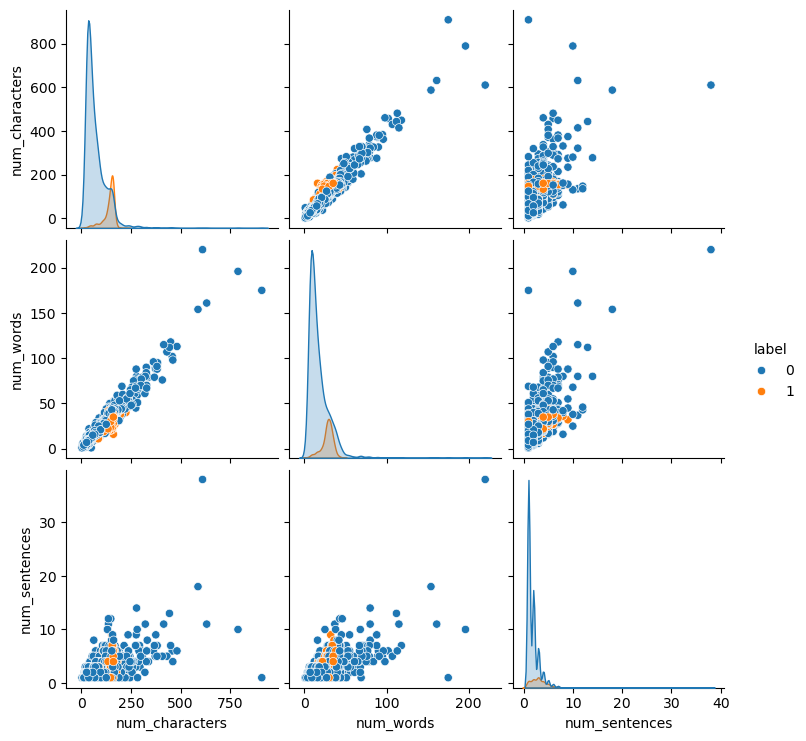

In [39]:
sns.pairplot(df,hue='label')

## 3.Data Preprocessing

In [40]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('stopwords')
ps=PorterStemmer()

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [41]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)
transformed_text=transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."
)
print(transformed_text)

gon na home soon want talk stuff anymor tonight k cri enough today


In [42]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [43]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."
)

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [44]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('stopwords')
ps=PorterStemmer()

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [45]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
df['transformed_text']=df['text'].apply(transform_text)

In [48]:
df.head()

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [50]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [51]:
spam_wc=wc.generate(df[df['label']==1]['transformed_text'].str.cat(sep=""))

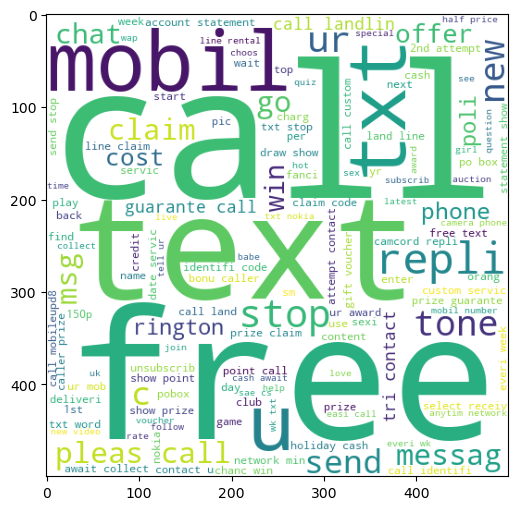

In [52]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [53]:
ham_wc=wc.generate(df[df['label']==0]['transformed_text'].str.cat(sep=""))

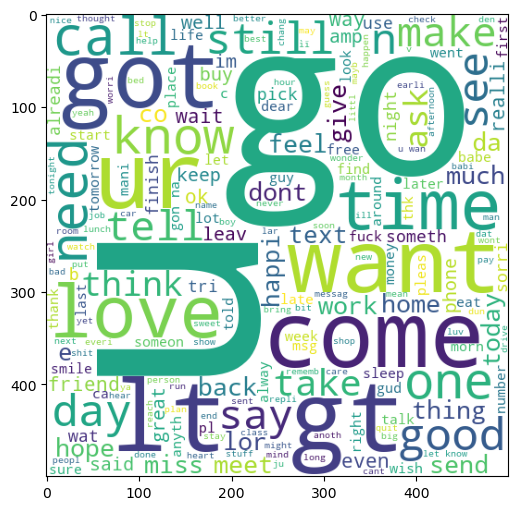

In [54]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [55]:
df.head()

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [56]:
spam_corpus=[]
for msg in df[df['label']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [57]:
len(spam_corpus)

9939

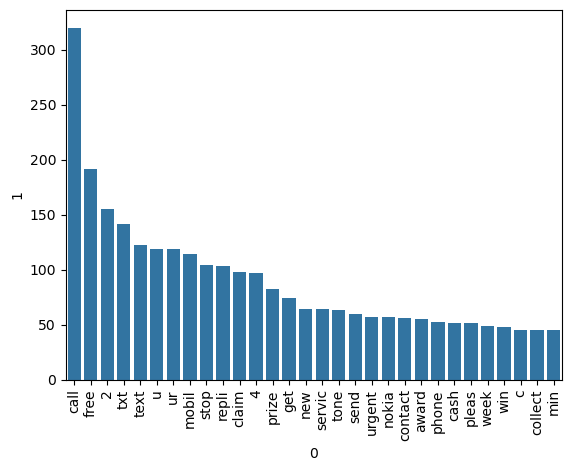

In [58]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [59]:
ham_corpus=[]
for msg in df[df['label']==1]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [60]:
len(ham_corpus)

9939

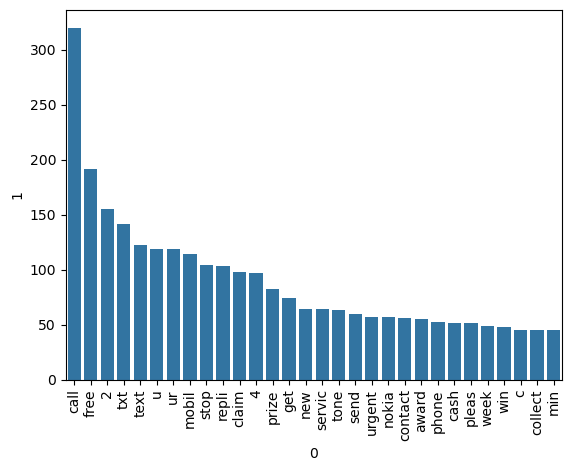

In [61]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4.Model Building

In [62]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [63]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [64]:
X.shape

(5169, 3000)

In [65]:
y=df['label'].values

In [66]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [69]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [70]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [71]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [72]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [73]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [74]:
#tfidf--->mnb

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [76]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='11')

In [77]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [78]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
X_train=["sample text 1","sample text 2","sample text 3"]
y_train=[0,1,0]
tfidf=TfidfVectorizer(lowercase=True,stop_words='english')
X_train_tfidf=tfidf.fit_transform(X_train)
mnb=MultinomialNB()
mnb.fit(X_train_tfidf,y_train)
with open('vectorizer.pkl','wb') as vectorizer_file:
    pickle.dump(tfidf,vectorizer_file)
with open('model.pkl','wb') as model_file:
    pickle.dump(mnb,model_file)

In [79]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."